# Random Forest, Bagging and Boosting

## Table of Contents:
1. [Background Reading](#background-Reading)
2. [Dataset](#dataset)
3. [Essence of Data](#essence-of-data)
    
   3.1 [Related Topics: Ensembles, weak learning, bagging, random forests, boosting](#Related-Topics:-Ensembles,-weak-learning,-bagging,-random-forests,-boosting)
       
   3.2 [Weak learning](#weak-learning)
   
   3.3 [Ensemble methods](#Ensemble-methods)
       
   3.4 [Types of ensemble methods](#Types-of-ensemble-methods)
                                                   
   3.4.1 [Bagging](#Bagging)
       
   3.4.2 [Random Forest](#Random-Forest)

   3.4.3 [Boosting](#Boosting)
       
    3.5 [Example 1](#Example-1)

    3.6 [Example 2](#Example-2)
       


## Background Reading

**Suggested Reading:**

*Intro to Statistical Learning*: 8.2 Bagging, Random Forests, Boosting, and Bayesian Additive Regression Trees, 
8.2.1 Bagging (Page 343-345, up to Out-of-Bag Error Estimation), 
8.2.2 Random Forests, 
8.2.3 Boosting

## Dataset
### Example - 1
The example uses the *COVID 19 Vaccine Uptake* dataset from a [literature](https://www.nature.com/articles/s41467-022-28200-3)

The dataset represents a study investigating COVID-19 vaccine hesitancy and uptake among participants from the United States and United Kingdom. It includes demographic details such as age, gender, race, and health status, as well as information on vaccination status. The study aims to explore differences in vaccine uptake across various population groups, highlighting disparities based on race, ethnicity, and health conditions. The dataset also captures participant characteristics like healthcare worker status and pre-existing comorbidities, offering insights into factors influencing vaccine acceptance during the early phase of vaccine distribution.

The data were collected until February 1, 2021. Hence, the values represent as follows:

- 1: The individual received the vaccine on or before February 1, 2021.
- 0: The individual did not receive the vaccine by that date.



### Example - 2
The example uses the *Titanic* dataset from kaggle [link](https://www.kaggle.com/datasets/yasserh/titanic-dataset)


## Essence of Data
### Related Topics: Ensembles, weak learning, bagging, random forests, boosting

**Weak learning:**

Simple building block models are sometimes referred to as “weak learners” because they have weak predictive ability on their own.

**Ensemble methods:**

Ensemble methods combine several decision tree models to produce better predictive performance than utilizing a single decision tree. Our goal is to reduce the variance of the statistical learning method.

**Types of ensemble methods:**
1. **Bagging:** 
    - Decision trees have high variance. (i.e., if we split the training data into two parts at random, and fit a decision tree to both halves, the results that we get could be very different).
    - Goal: We want a statistical learning model with low variance (i.e.,  if we split the training data into two parts at random, and fit a decision tree to both halves, the results that we get will be very similar). Averaging a set of observations reduces variance.
    - Method:
        1. Create several subsets of data from training samples chosen randomly with replacement. 
        2. Each collection of subset data is used to train their own decision trees. As a result, we end up with an ensemble of different models. 
        3. Average of all the predictions from different trees are used which is more robust than a single decision tree.
        
        <div align = 'center'><font size = '6'>$\hat{f}_{avg}(x)=\frac{1}{B}\displaystyle\sum_{b=1}^B\hat{f^b}(x)$</font></div>
        
2. **Random Forest:**
    - Advantages of using Random Forest technique:
        1. Handles higher dimensionality data very well.
        2. Handles missing values and maintains accuracy for missing data.
    - Disadvantages of using Random Forest technique:
        1. Since final prediction is based on the mean predictions from subset trees, it won’t give precise values for the regression model.
<br>

3. **Boosting:**

- Gradient boosting is a machine learning technique used in regression and classification tasks, among others. It gives a prediction model in the form of an ensemble of weak prediction models, which are typically decision trees.
- When a decision tree is the weak learner, the resulting algorithm is called gradient-boosted trees, and it usually outperforms random forest.
- A gradient-boosted trees model is built in a stage-wise fashion as in other boosting methods, but it generalizes the other methods by allowing optimization of an arbitrary differentiable loss function.

**Source:** [Wikipedia]((https://en.wikipedia.org/wiki/Gradient_boosting)

More to [read](https://www.nvidia.com/en-us/glossary/xgboost/)



## Example 1

In [110]:
# Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
# Load the dataset 
addataset = pd.read_csv('COVID19VaccineUptake.csv')
addataset.head()

,country_code,feb1orbefore.bin,agegroup,created.date,sex.bin,race.filt2,has_diabetes,has_heart_disease,has_lung_disease_only.filt,has_kidney_disease,smoke.main,bmigroup,ever_covid,hcw_yn,ed_q,income_q,region,race.pooled,Count
0,US,0,45-54,3/29/20,female,White,False,False,False,False,yes/prior,BMI 18.5-24.9,False,False,NaN,NaN,NaN,US.White,2
1,US,0,>=65,4/6/20,female,White,True,False,False,True,no,BMI>=30,False,True,NaN,NaN,NaN,US.White,1
2,US,0,<25,4/14/20,female,US Asian,False,False,False,False,no,BMI 18.5-24.9,False,False,NaN,NaN,NaN,US.Other,1
3,US,0,25-34,4/14/20,female,White,False,False,False,False,no,BMI 18.5-24.9,False,False,NaN,NaN,NaN,US.White,2
4,US,0,25-34,1/8/21,female,Hispanic,False,False,False,False,no,BMI 18.5-24.9,True,False,NaN,NaN,NaN,US.Other,1


In [114]:
# Drop irrelevant columns
dataset = addataset.drop(['country_code','race.filt2','created.date', 'Count'], axis = 1)
dataset

,feb1orbefore.bin,agegroup,sex.bin,has_diabetes,has_heart_disease,has_lung_disease_only.filt,has_kidney_disease,smoke.main,bmigroup,ever_covid,hcw_yn,ed_q,income_q,region,race.pooled
0,0,45-54,female,False,False,False,False,yes/prior,BMI 18.5-24.9,False,False,NaN,NaN,NaN,US.White
1,0,>=65,female,True,False,False,True,no,BMI>=30,False,True,NaN,NaN,NaN,US.White
2,0,<25,female,False,False,False,False,no,BMI 18.5-24.9,False,False,NaN,NaN,NaN,US.Other
3,0,25-34,female,False,False,False,False,no,BMI 18.5-24.9,False,False,NaN,NaN,NaN,US.White
4,0,25-34,female,False,False,False,False,no,BMI 18.5-24.9,True,False,NaN,NaN,NaN,US.Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63519,0,35-44,non-female,False,False,False,False,no,BMI <18.5,False,True,NaN,NaN,NaN,US.Black
63520,0,55-64,female,False,False,False,False,no,BMI 18.5-24.9,False,False,NaN,NaN,NaN,US.White
63521,0,>=65,female,False,False,False,False,no,BMI 18.5-24.9,False,False,NaN,NaN,NaN,US.White
63522,0,>=65,non-female,False,False,False,False,yes/prior,BMI 25-29.9,False,False,NaN,NaN,NaN,US.White


In [116]:
# Check the null values 
dataset.isnull().sum()

feb1orbefore.bin                 0
agegroup                         0
sex.bin                          0
has_diabetes                     0
has_heart_disease                0
has_lung_disease_only.filt       0
has_kidney_disease               0
smoke.main                       0
bmigroup                         0
ever_covid                       0
hcw_yn                           0
ed_q                          1756
income_q                      1913
region                        1774
race.pooled                      0
dtype: int64

In [118]:
# Drop rows containing null values 
df = dataset.dropna()
df

,feb1orbefore.bin,agegroup,sex.bin,has_diabetes,has_heart_disease,has_lung_disease_only.filt,has_kidney_disease,smoke.main,bmigroup,ever_covid,hcw_yn,ed_q,income_q,region,race.pooled
44,0,25-34,non-female,False,False,False,True,yes/prior,BMI <18.5,False,False,Q2,Q2,northeast,US.White
45,0,25-34,non-female,False,False,False,False,no,BMI 18.5-24.9,False,False,Q4,Q1,northeast,US.White
46,0,35-44,non-female,False,False,False,False,yes/prior,BMI 25-29.9,False,False,Q4,Q1,northeast,US.White
47,1,>=65,female,False,False,False,False,no,BMI 18.5-24.9,False,True,Q4,Q1,northeast,US.White
48,0,55-64,female,False,False,False,False,no,BMI 25-29.9,False,False,Q4,Q1,northeast,US.White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62287,0,25-34,female,False,False,False,False,no,BMI 25-29.9,False,False,Q2,Q3,west,US.White
62288,0,45-54,female,False,False,False,False,no,BMI>=30,False,False,Q2,Q3,west,US.White
62289,1,>=65,female,False,False,False,False,no,BMI 18.5-24.9,False,False,Q2,Q3,west,US.White
62291,1,>=65,non-female,False,False,False,False,no,BMI 25-29.9,False,False,Q1,Q2,west,US.White


In [120]:
# Rename the columns
df = df.rename(columns = 
               {'feb1orbefore.bin': 'vaccine_uptake',
                'sex.bin': 'gender',
                'has_lung_disease_only.filt': 'has_lung_disease',
                'smoke.main': 'smoking_status',
                'hcw_yn': 'health_worker',
                'race.pooled': 'race'
})

df.head()

,vaccine_uptake,agegroup,gender,has_diabetes,has_heart_disease,has_lung_disease,has_kidney_disease,smoking_status,bmigroup,ever_covid,health_worker,ed_q,income_q,region,race
44,0,25-34,non-female,False,False,False,True,yes/prior,BMI <18.5,False,False,Q2,Q2,northeast,US.White
45,0,25-34,non-female,False,False,False,False,no,BMI 18.5-24.9,False,False,Q4,Q1,northeast,US.White
46,0,35-44,non-female,False,False,False,False,yes/prior,BMI 25-29.9,False,False,Q4,Q1,northeast,US.White
47,1,>=65,female,False,False,False,False,no,BMI 18.5-24.9,False,True,Q4,Q1,northeast,US.White
48,0,55-64,female,False,False,False,False,no,BMI 25-29.9,False,False,Q4,Q1,northeast,US.White


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61276 entries, 44 to 62292
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   vaccine_uptake      61276 non-null  int64 
 1   agegroup            61276 non-null  object
 2   gender              61276 non-null  object
 3   has_diabetes        61276 non-null  bool  
 4   has_heart_disease   61276 non-null  bool  
 5   has_lung_disease    61276 non-null  bool  
 6   has_kidney_disease  61276 non-null  bool  
 7   smoking_status      61276 non-null  object
 8   bmigroup            61276 non-null  object
 9   ever_covid          61276 non-null  bool  
 10  health_worker       61276 non-null  bool  
 11  ed_q                61276 non-null  object
 12  income_q            61276 non-null  object
 13  region              61276 non-null  object
 14  race                61276 non-null  object
dtypes: bool(6), int64(1), object(8)
memory usage: 5.0+ MB


In [124]:
# Define predictors (x) and target (y)
predictors = df.drop('vaccine_uptake', axis = 1)
target = df['vaccine_uptake']

In [126]:
# Convert categorical variables to dummies
predictors = pd.get_dummies(predictors, columns = ['agegroup','gender','smoking_status','bmigroup','ed_q','income_q','region','race'])
predictors.head()

,has_diabetes,has_heart_disease,has_lung_disease,has_kidney_disease,ever_covid,health_worker,agegroup_25-34,agegroup_35-44,agegroup_45-54,agegroup_55-64,...,income_q_Q2,income_q_Q3,income_q_Q4,region_midwest,region_northeast,region_south,region_west,race_US.Black,race_US.Other,race_US.White
44,False,False,False,True,False,False,True,False,False,False,...,True,False,False,False,True,False,False,False,False,True
45,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
46,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
47,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
48,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,True


In [128]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.2, random_state = 42)


In [130]:
# Decision Tree Classifier
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state = 42)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

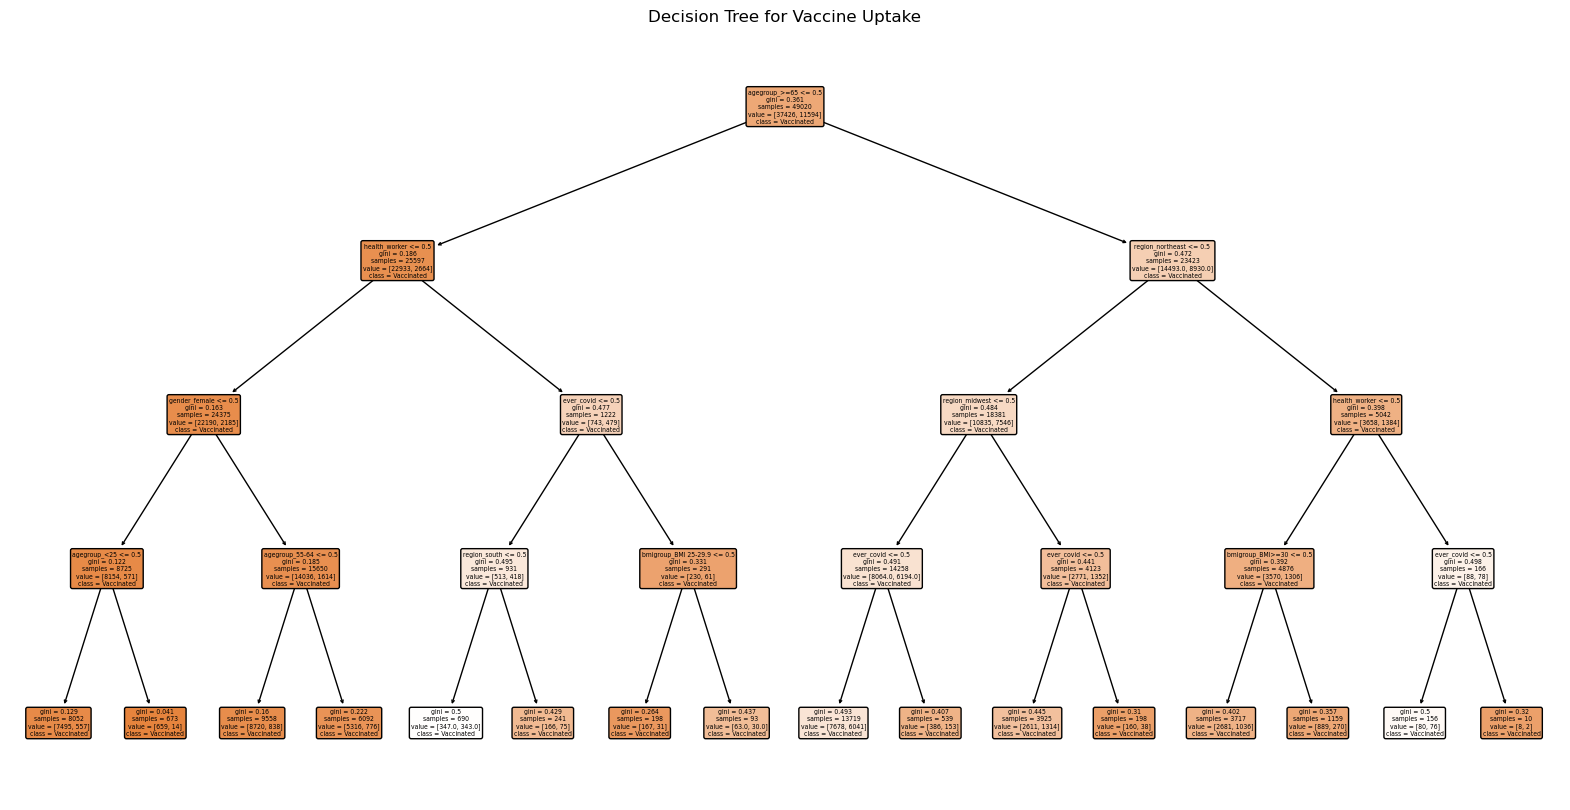

In [132]:
# Plot the decision tree
plt.figure(figsize = (20,10))  
plot_tree(clf, filled = True, feature_names = predictors.columns, class_names = ['Vaccinated', 'Not Vaccinated'], rounded = True)
plt.title("Decision Tree for Vaccine Uptake")
plt.show()

In [134]:
# Predict on the test set
y_pred_clf = clf.predict(x_test)

# Evaluate the model
clf_accuracy = accuracy_score(y_test, y_pred_clf)*100
print('Accuracy of the Decision Tree Classification Model: {:.4f}%'.format(clf_accuracy))


Accuracy of the Decision Tree Classification Model: 76.0281%


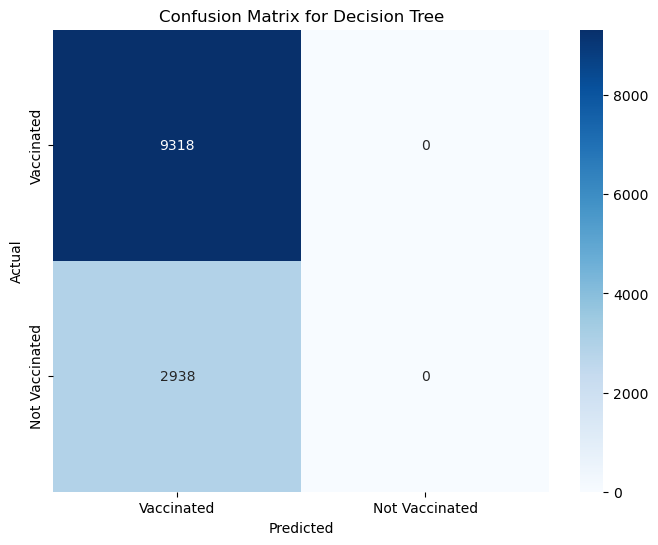

In [136]:
# Confusion matrix 
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_clf), annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels = ['Vaccinated', 'Not Vaccinated'], 
            yticklabels = ['Vaccinated', 'Not Vaccinated'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

In [138]:
# Bagging with Decision Tree as the base model
bgg_clf = BaggingClassifier(estimator = DecisionTreeClassifier(), n_estimators = 100, random_state = 42)
bgg_clf.fit(x_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42)

In [139]:
# Predict on the test set
y_pred_bgg_clf = bgg_clf.predict(x_test)

# Evaluate the model
bgg_clf_accuracy = accuracy_score(y_test, y_pred_bgg_clf)*100
print('Accuracy of the Bagging Model: {:.4f}%'.format(bgg_clf_accuracy))


Accuracy of the Bagging Model: 74.3309%


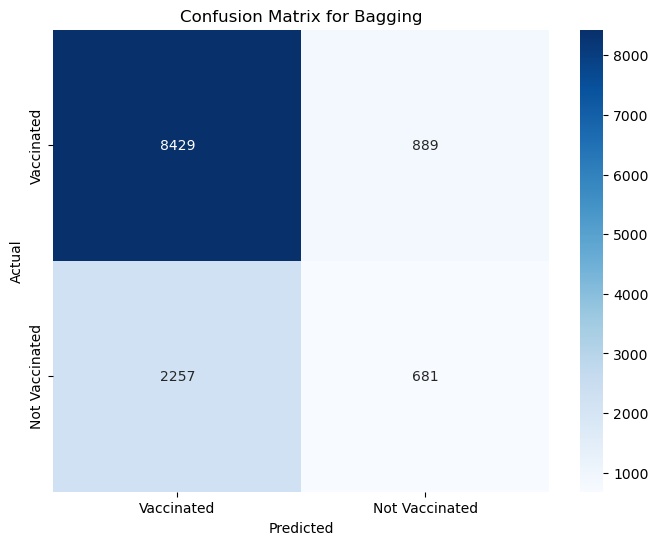

In [140]:
# Confusion matrix 
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_bgg_clf), annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels = ['Vaccinated', 'Not Vaccinated'], 
            yticklabels = ['Vaccinated', 'Not Vaccinated'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Bagging')
plt.show()

In [141]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators = 500, random_state = 42)
#rf = RandomForestClassifier(n_estimators = 100, class_weight='balanced', random_state = 42)
rf.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [142]:
# Predict on the test set
y_pred_rf = rf.predict(x_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred_rf)*100
print('Accuracy of the Random Forest Model: {:.4f}%'.format(rf_accuracy))


Accuracy of the Random Forest Model: 66.6449%


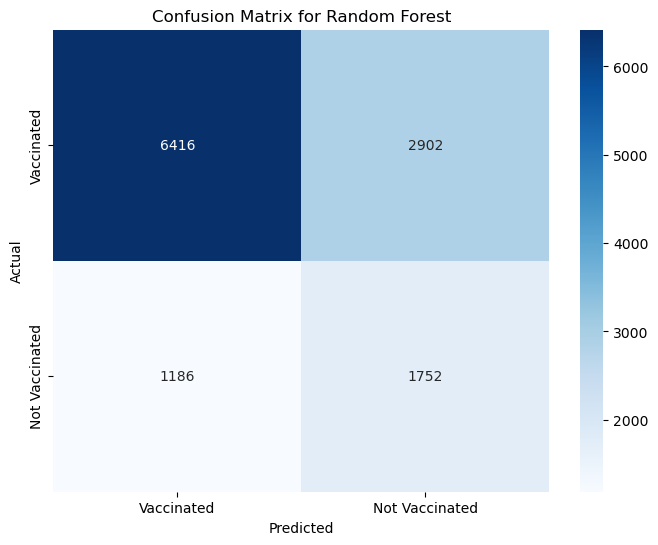

In [143]:
# Confusion matrix 
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels = ['Vaccinated', 'Not Vaccinated'], 
            yticklabels = ['Vaccinated', 'Not Vaccinated'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Random Forest')
plt.show()

## Example 2

In [51]:
#pip install xgboost

In [151]:
# Import the necessary libraries
import pandas as pd
import numpy as np  
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost import XGBClassifier
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
# Load the dataset 
df = pd.read_csv('Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [155]:
# Check the null values 
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [157]:
# Drop irrelevant columns
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Rename the columns
df = df.rename(columns = 
               {'SibSp': 'SiblingsSpouse',
                'Parch': 'ParentsChildren',
})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Survived         891 non-null    int64  
 1   Pclass           891 non-null    int64  
 2   Sex              891 non-null    object 
 3   Age              714 non-null    float64
 4   SiblingsSpouse   891 non-null    int64  
 5   ParentsChildren  891 non-null    int64  
 6   Fare             891 non-null    float64
 7   Embarked         889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [159]:
# Adjust the missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.isnull().sum()

Survived           0
Pclass             0
Sex                0
Age                0
SiblingsSpouse     0
ParentsChildren    0
Fare               0
Embarked           0
dtype: int64

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Survived         891 non-null    int64  
 1   Pclass           891 non-null    int64  
 2   Sex              891 non-null    object 
 3   Age              891 non-null    float64
 4   SiblingsSpouse   891 non-null    int64  
 5   ParentsChildren  891 non-null    int64  
 6   Fare             891 non-null    float64
 7   Embarked         891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [163]:
# Convert categorical variables to numerical
df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df.head()

,Survived,Pclass,Sex,Age,SiblingsSpouse,ParentsChildren,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [165]:
# Define predictors (x) and target (y)
x = df.drop('Survived', axis=1)
y = df['Survived']


In [167]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 44)


In [169]:
# Decision Tree Classifier
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state = 44)
clf.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=44)

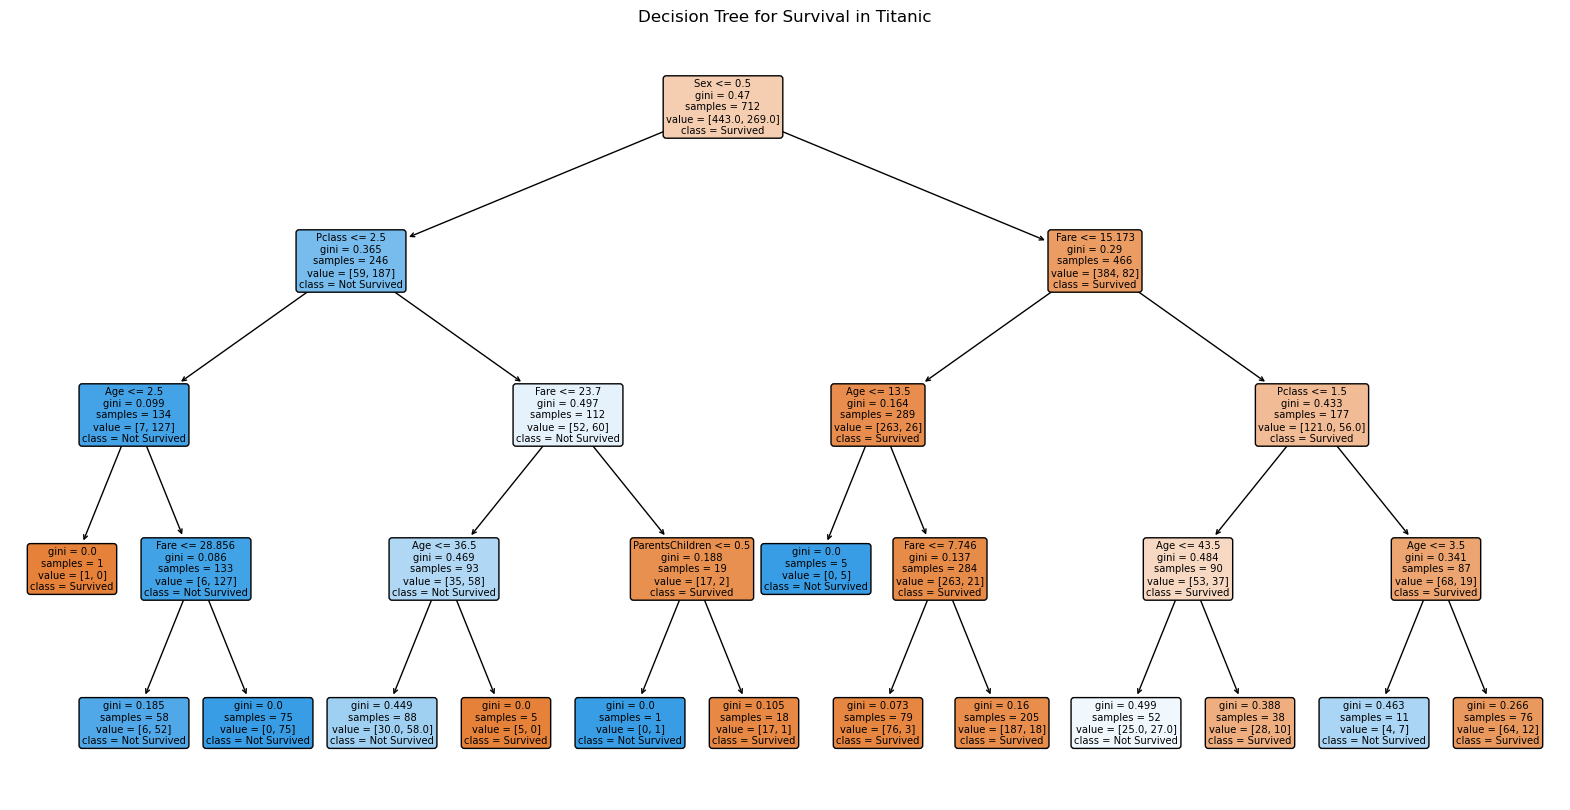

In [171]:
# Plot the decision tree
plt.figure(figsize = (20,10))  
plot_tree(clf, filled = True, feature_names = x.columns, class_names = ['Survived', 'Not Survived'], rounded = True)
plt.title("Decision Tree for Survival in Titanic")
plt.show()

In [173]:
# Predict on the test set
y_pred_clf = clf.predict(x_test)

# Evaluate the model
clf_accuracy = accuracy_score(y_test, y_pred_clf)*100
print('Accuracy of the Decision Tree Classification Model: {:.4f}%'.format(clf_accuracy))

Accuracy of the Decision Tree Classification Model: 73.1844%


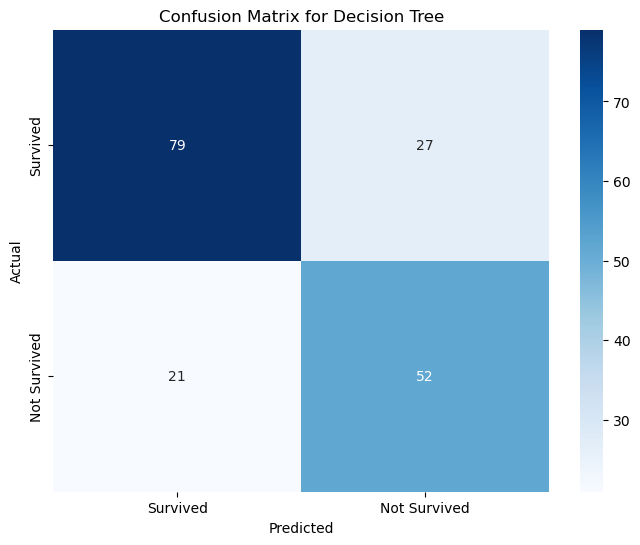

In [175]:
# Confusion matrix 
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_clf), annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels = ['Survived', 'Not Survived'], 
            yticklabels = ['Survived', 'Not Survived'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

In [177]:
# Bagging with Decision Tree as the base model
bgg_clf = BaggingClassifier(estimator = DecisionTreeClassifier(), n_estimators = 100, random_state = 44)
bgg_clf.fit(x_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=44)

In [179]:
# Predict on the test set
y_pred_bgg_clf = bgg_clf.predict(x_test)

# Evaluate the model
bgg_clf_accuracy = accuracy_score(y_test, y_pred_bgg_clf)*100
print('Accuracy of the Bagging Model: {:.4f}%'.format(bgg_clf_accuracy))

Accuracy of the Bagging Model: 73.7430%


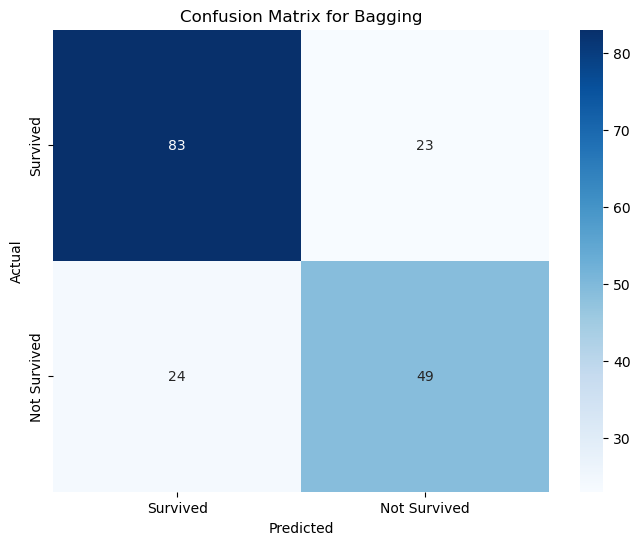

In [181]:
# Confusion matrix 
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_bgg_clf), annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels = ['Survived', 'Not Survived'], 
            yticklabels = ['Survived', 'Not Survived'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Bagging')
plt.show()

In [183]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators = 500, random_state = 44)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=44)

In [184]:
# Predict on the test set
y_pred_rf = rf.predict(x_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred_rf)*100
print('Accuracy of the Random Forest Model: {:.4f}%'.format(rf_accuracy))

Accuracy of the Random Forest Model: 70.3911%


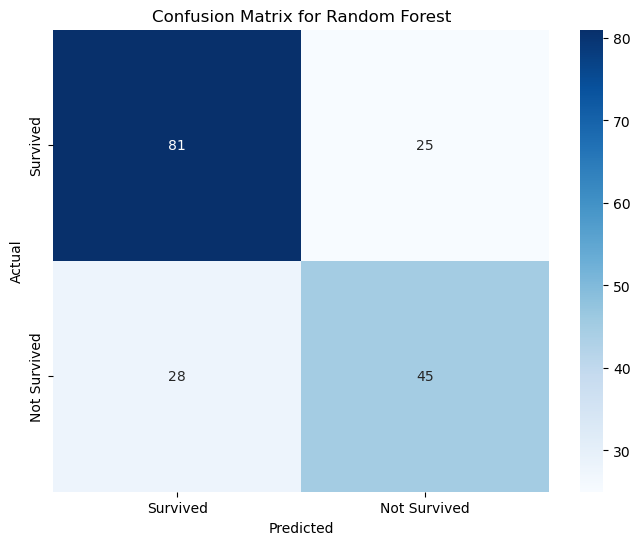

In [187]:
# Confusion matrix 
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels = ['Survived', 'Not Survived'], 
            yticklabels = ['Survived', 'Not Survived'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Random Forest')
plt.show()

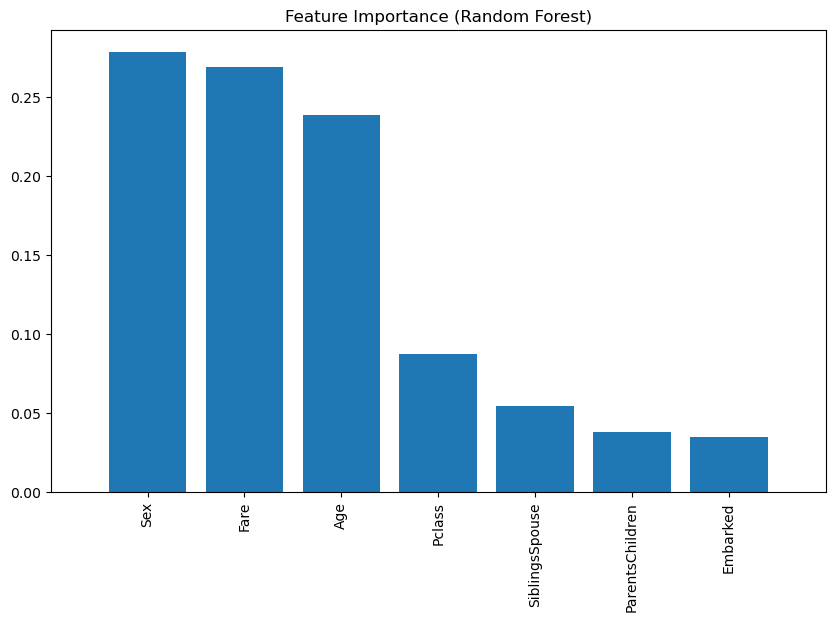

In [189]:
# Check feature importance
importances = rf.feature_importances_

# Sort feature importance in descending order
indices = np.argsort(importances)[::-1]

# Create a plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Random Forest)")
plt.bar(range(x_train.shape[1]), importances[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices], rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()


In [201]:
# Boosting (XGBoost)
xgb_model = XGBClassifier(n_estimators = 100, learning_rate = 0.1, random_state = 44)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=44, ...)

In [203]:
# Predict on the test set
y_pred_xgb_model = xgb_model.predict(x_test)

# Evaluate the model
xgb_model_accuracy = accuracy_score(y_test, y_pred_xgb_model)*100
print('Accuracy of the XGBoost Model: {:.4f}%'.format(xgb_model_accuracy))

Accuracy of the XGBoost Model: 74.8603%


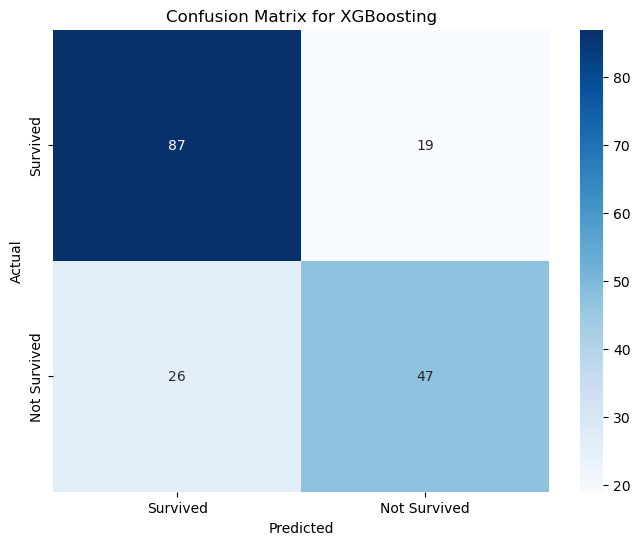

In [205]:
# Confusion matrix 
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb_model), annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels=['Survived', 'Not Survived'], 
            yticklabels=['Survived', 'Not Survived'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for XGBoosting')
plt.show()

<Figure size 1000x800 with 0 Axes>

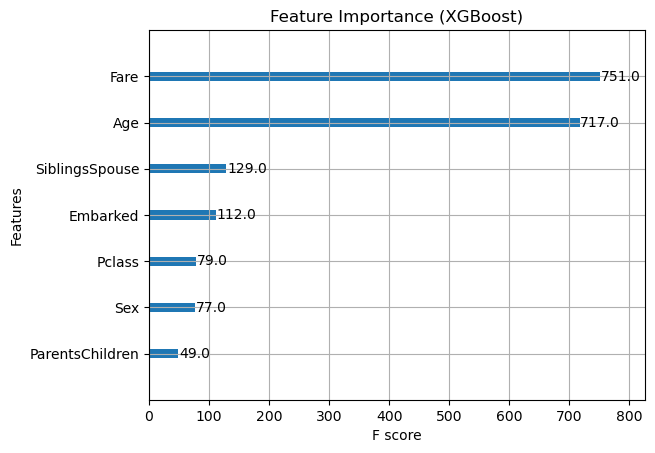

In [207]:
# Plot feature importance
plt.figure(figsize=(10, 8))
xgb.plot_importance(xgb_model, importance_type='weight')
plt.title('Feature Importance (XGBoost)')
plt.show()